# Preprocessing - Predictor data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# Import Predictor data
data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      float64
 17  hq              float64
 18  music           float64
 19  level_group     object 
dtypes: float64(9), int64(4), object(7)
memory usage: 2.0+ GB


Before performing preprocessing, the following are some observations from a quick glance of the dataset
* There are `20` variables/features/columns
* There are `13174211` observations/samples/rows
* All seem to be predictor variables.     
* There are `4` variables identified as `int64`.
* There are `7` variables identified as `object`.
* There are `9` variables identified as `float64`.
* `3` of the variables/features seem to have any missing value

The memory usage is over 2GB.

In [3]:
data

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [4]:
data.describe(include='all')

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
count,1.317421e+07,1.317421e+07,1.317421e+07,13174211,13174211,1.317421e+07,284746.000000,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06,4806891,9014563,13174211,4806945,0.0,0.0,0.0,13174211
unique,NaN,NaN,NaN,11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,594,127,19,126,NaN,NaN,NaN,3
top,NaN,NaN,NaN,navigate_click,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,worker,tunic.historicalsociety.entry,tunic.historicalsociety.cage.confrontation,NaN,NaN,NaN,13-22
freq,NaN,NaN,NaN,5687896,6377305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178294,939555,1816202,333363,NaN,NaN,NaN,6746397
mean,2.113413e+16,6.526426e+02,3.846817e+06,NaN,NaN,1.219194e+01,3.157930,-5.493615e+01,-1.162997e+02,4.581144e+02,3.852363e+02,3.186237e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.665220e+14,6.275818e+02,2.701387e+07,NaN,NaN,6.499188e+00,2.064042,5.201468e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.009031e+16,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.101031e+16,2.890000e+02,4.394300e+05,NaN,NaN,6.000000e+00,1.000000,-3.529376e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.104022e+16,5.960000e+02,1.013425e+06,NaN,NaN,1.300000e+01,3.000000,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.110051e+16,8.970000e+02,1.740050e+06,NaN,NaN,1.800000e+01,5.000000,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above overview of the dataset, the following 2 steps can be done to reduce the memory usage:
- Remove columns with no useful data
    - `music`, `hq` and `fullscreen` variables seem to only have `NaN` as its value
- Change datatypes of certain variables
    - Reduce the number of bits allocated to each variable if data do not utilize it

### Remove columns with just 'NaN' as values

In [5]:
# Drop columns with NaN only
data = data.drop(['music','hq','fullscreen'], axis=1)
data

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


### Change Variables' datatype

In [6]:
data['elapsed_time'] = data['elapsed_time'].astype(np.uint32)
data['level'] = data['level'].astype(np.uint8)
data['room_coor_x'] = data['room_coor_x'].astype(np.float32)
data['room_coor_y'] = data['room_coor_y'].astype(np.float32)
data['screen_coor_x'] = data['screen_coor_x'].astype(np.float32)
data['screen_coor_y'] = data['screen_coor_y'].astype(np.float32)
data['hover_duration'] = data['hover_duration'].astype(np.float32)


columns_to_convert = ['session_id','event_name','name','text','fqid','room_fqid','text_fqid','level_group']

for column in columns_to_convert:
    data[column] = data[column].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 17 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      category
 1   index           int64   
 2   elapsed_time    uint32  
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  level_group     category
dtypes: category(8), float32(5), float64(1), int64(1), uint32(1), uint8(1)
memory usage: 653.7 MB


After performing preprocessing, the following are some observations from the dataset
* There are `17` variables/features/columns
    * reduced by 3 as it does not contain any value
* There are `13174211` observations/samples/rows
* There are `1` variables identified as `int64`.
* There are `1` variables identified as `uint32`, which is unsigned integer of 32 bits.
* There are `1` variables identified as `uint8`, which is unsigned integer of 8 bits.
* There are `8` variables identified as `category`, which is object.
* There are `5` variables identified as `float32`.

The memory usage have been reduced significantly to be under 700MB, which is about 70% reduction.

# Preprocessing - Response data

In [7]:
# Import response data
predictorData = pd.read_csv("train_labels.csv")
predictorData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  212022 non-null  object
 1   correct     212022 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


Before performing preprocessing, the following are some observations from a quick glance of the dataset
* There are `2` variables/features/columns
* There are `212022` observations/samples/rows
* `correct` seem to be response variable     
* There are `1` variables identified as `int64`
* There are `1` variables identified as `object`

In [8]:
predictorData.describe(include='all')

,session_id,correct
count,212022,212022.000000
unique,212022,NaN
top,20090312431273200_q1,NaN
freq,1,NaN
mean,NaN,0.703946
std,NaN,0.456516
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [9]:
print(predictorData.head(100))

              session_id  correct
0   20090312431273200_q1        1
1   20090312433251036_q1        0
2   20090314121766812_q1        1
3   20090314363702160_q1        1
4   20090314441803444_q1        1
..                   ...      ...
95  20100111290365256_q1        0
96  20100111293440890_q1        1
97  20100111315145150_q1        1
98  20100111354105336_q1        1
99  20100111374821010_q1        1

[100 rows x 2 columns]


The format of train_labels.csv (response data) is different from train.csv (predictor data). Thus, both csv cannot be combined simply.

With this, the it need to be reformatted:
* Split `session_id` into 2 columns - `sessionID` and `qns`
* Clean up `qns` by removing "q" in the data

In [10]:
# 1. split the "session_id" column into "sessionID" and "qns"
split_predictorData = predictorData['session_id'].str.split("_", expand=True)
# rename the headers
split_predictorData = split_predictorData.rename(columns={split_predictorData.columns[0]: 'sessionID', split_predictorData.columns[1]: 'qns'})
# combine the dataframe of the 2 split items and the correct column of the original dataframe
processed_predictorData = pd.concat([split_predictorData, predictorData['correct']], axis=1)
#change datatype for 'correct' column from int64 to object (CONSIDER 'BOOL' INSTEAD)
processed_predictorData['correct'] = processed_predictorData['correct'].astype('object')

# 2. split the "qns" column into "q" and "question id"
split_qns = processed_predictorData['qns'].str.split("q", expand=True)
split_qns = split_qns.rename(columns={split_qns.columns[0]: 'q', split_qns.columns[1]: 'qns'})
# combine the dataframe of the 'qns' into processed_predictorData
processed_predictorData_sortedBySessionID = pd.concat([processed_predictorData['sessionID'], split_qns['qns'], processed_predictorData['correct']], axis=1)
# convert the datatype of qns to integer for sorting
processed_predictorData_sortedBySessionID['qns'] = processed_predictorData_sortedBySessionID['qns'].astype('int')
# sort the dataset according to ascending order of the 'sessionID' and 'qns'
processed_predictorData_sortedBySessionID = processed_predictorData_sortedBySessionID.sort_values(['sessionID', 'qns'], ascending=[True, True])
# reset the index
processed_predictorData_sortedBySessionID = processed_predictorData_sortedBySessionID.reset_index(drop=True)

# 3. Have a overview of data
processed_predictorData_sortedBySessionID.info()
processed_predictorData_sortedBySessionID.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sessionID  212022 non-null  object
 1   qns        212022 non-null  int32 
 2   correct    212022 non-null  object
dtypes: int32(1), object(2)
memory usage: 4.0+ MB


,sessionID,qns,correct
0,20090312431273200,1,1
1,20090312431273200,2,1
2,20090312431273200,3,1
3,20090312431273200,4,1
4,20090312431273200,5,1
5,20090312431273200,6,1
6,20090312431273200,7,1
7,20090312431273200,8,1
8,20090312431273200,9,1
9,20090312431273200,10,1


After performing preprocessing, the following are some observations of the dataset
* There are `3` variables/features/columns
    * increased by 1 as session_id is splitted into 2 columns
* `212022` observations/samples/rows in the dataset.
* All seem to be response variables.     
* There are `1` variables identified as `int64`.
* There are `2` variables identified as `object`.

# Combine Response & Predictor data

<b>Response Data</b>
* Divide the data into 3 sections based on `qns` in accordance to `level_group` 
    * `0-4` : `qns` is from 1 to 3
    * `5-12` : `qns` is from 4 to 13
    * `13-22` : `qns` is from 14 to 18

<b>Predictor Data</b>
* Slot and divide the data according to on `level_group`
* Extract the characteristic value for each predictor column
    1. `elapsed_time` : Total Time - last `elapsed_time` value of each player
    2. `event_name` : Top - value with the most count of each player
    3. `name` : Top - value with the most count of each player
    4. `level` : Deleted - value only indicates the stage of the game
    5. `page` : Bool - value represents if player clikced(1) or did not click (0) on notebook which stores the clue collected
    6. `room_coor_x`, `room_coor_y`, `screen_coor_x` and `screen_coor_y` : Fullscreen - Evaluate if the player is in fullscreen (1) or not (0)
    7. `hover_duration` : Mean - indicates the duration in which the cursor was positioned over a particular area of a computer screen
    8. `text` : Deleted - value only indicates the game's NPCs
    9. `room_fqid` : Deleted - value only indicates the game's NPCs
    10. `text_fqid` : Deleted - value only indicates the game's NPCs
    11. `level_group` : Retained
    
<b>Append the results of the 18 questions at the end of each row for each player</b>

### Divide the response data into 3 different dataframe
* Divide the data into 3 sections based on `qns` in accordance to `level_group` 
    * `0-4` : `qns` is from 1 to 3
    * `5-12` : `qns` is from 4 to 13
    * `13-22` : `qns` is from 14 to 18

In [11]:
sub1 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']<4]
sub1 = sub1.sort_values(['sessionID', 'qns']).reset_index()
sub1 = sub1.drop(['index'],axis=1)

sub2 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']>=4]
sub2 = sub2[sub2['qns']<14]
sub2 = sub2.sort_values(['sessionID', 'qns']).reset_index()
sub2 = sub2.drop(['index'],axis=1)

sub3 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']>=14]
sub3 = sub3.sort_values(['sessionID', 'qns']).reset_index()
sub3 = sub3.drop(['index'],axis=1)

display(sub1, sub2, sub3)

,sessionID,qns,correct
0,20090312431273200,1,1
1,20090312431273200,2,1
2,20090312431273200,3,1
3,20090312433251036,1,0
4,20090312433251036,2,1
...,...,...,...
35332,22100219442786200,2,1
35333,22100219442786200,3,1
35334,22100221145014656,1,0
35335,22100221145014656,2,1


,sessionID,qns,correct
0,20090312431273200,4,1
1,20090312431273200,5,1
2,20090312431273200,6,1
3,20090312431273200,7,1
4,20090312431273200,8,1
...,...,...,...
117785,22100221145014656,9,1
117786,22100221145014656,10,0
117787,22100221145014656,11,1
117788,22100221145014656,12,1


,sessionID,qns,correct
0,20090312431273200,14,1
1,20090312431273200,15,1
2,20090312431273200,16,0
3,20090312431273200,17,1
4,20090312431273200,18,1
...,...,...,...
58890,22100221145014656,14,0
58891,22100221145014656,15,0
58892,22100221145014656,16,0
58893,22100221145014656,17,1


### Slot the predictor data
* Slot and divide the data according to on `level_group`

In [12]:
test = data.sort_values(['session_id', 'level_group'], ascending=[True, True])
test

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173446,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173447,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173448,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
13173449,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


### Extract characteristic value for each column
1. `elapsed_time` : Total Time - last `elapsed_time` value of each player
2. `event_name` : Top - value with the most count of each player
3. `name` : Top - value with the most count of each player
4. `level` : Deleted - value only indicates the stage of the game
5. `page` : Bool - value represents if player clikced(1) or did not click (0) on notebook which stores the clue collected
6. `room_coor_x`, `room_coor_y`, `screen_coor_x` and `screen_coor_y` : Fullscreen - Evaluate if the player is in fullscreen (1) or not (0)
7. `hover_duration` : Mean - indicates the duration in which the cursor was positioned over a particular area of a computer screen
8. `text` : Deleted - value only indicates the game's NPCs
9. `room_fqid` : Deleted - value only indicates the game's NPCs
10. `text_fqid` : Deleted - value only indicates the game's NPCs
11. `level_group` : Retained
    
Overall for categorical values, since we're preprocessing them into binary categorical values, we temtatively just use label encoding rather than one-hot encoding as one-hot encoding may not provide significant benefits but also creates too many columns.

#### Section 1 : `level_group` of 0-4

In [13]:
data1 = test[test['level_group'] == '0-4']
data1

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13172870,22100221145014656,206,352635,navigate_click,undefined,4,NaN,-914.204224,-50.000000,26.0,380.0,NaN,NaN,toentry,tunic.kohlcenter.halloffame,NaN,0-4
13172871,22100221145014656,207,353336,map_hover,basic,4,NaN,NaN,NaN,NaN,NaN,84.0,NaN,tunic.kohlcenter,tunic.kohlcenter.halloffame,NaN,0-4
13172872,22100221145014656,208,354020,map_click,undefined,4,NaN,-549.217712,-2.000000,449.0,332.0,NaN,NaN,tunic.capitol_0,tunic.kohlcenter.halloffame,NaN,0-4
13172873,22100221145014656,209,356238,navigate_click,undefined,4,NaN,313.584259,107.913147,463.0,226.0,NaN,NaN,chap1_finale,tunic.capitol_0.hall,NaN,0-4


In [14]:
# ===== Factor 1 : Total "elapsed_time" value of each player =====
total_elapsed_time = data1.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# ===== Factor 2 & 3: Value with the most count of each player =====
filtered_data = data1[(data1['event_name'] != 'navigate_click') & (data1['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# ===== Factor 5 : Value represents if player clikced(1) or did not click (0) on notebook=====
avg_page = data1.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# ===== Factor 6 : Evaluate if the player is in fullscreen (1) or not (0) =====

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data1.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data1['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})

# ===== Factor 7 : Mean of the all the values for each player =====
avg_hover_duration = data1.groupby(['session_id'])['hover_duration'].mean().reset_index()

# ===== Merge the variable data =====
temp_level_group = pd.DataFrame({'level_group': ['0-4'] * 11779})
part1 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part1 = pd.concat([part1]*3, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

for i in range(0,35337):
    if (i%3) == 0:
        part1.iloc[i, -1] = 1
    elif (i%3) == 1:
        part1.iloc[i, -1] = 2
    elif (i%3) == 2:
        part1.iloc[i, -1] = 3
        
part1 = part1.rename(columns={'level_group': 'qns'})
part1 = pd.concat([part1, sub1['correct']], axis = 1) #Append response variable

part1

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.50000,1,1
1,20090312431273200,194860,person_click,0,1,2389.50000,2,1
2,20090312431273200,194860,person_click,0,1,2389.50000,3,1
3,20090312433251036,233752,person_click,1,1,1378.75000,1,0
4,20090312433251036,233752,person_click,1,1,1378.75000,2,1
...,...,...,...,...,...,...,...,...
35332,22100219442786200,191727,person_click,1,1,3337.50000,2,1
35333,22100219442786200,191727,person_click,1,1,3337.50000,3,1
35334,22100221145014656,435055,object_click,1,1,4164.63623,1,0
35335,22100221145014656,435055,object_click,1,1,4164.63623,2,1


#### Section 2 : `level_group` of 5-12

In [15]:
data2 = test[test['level_group'] == '5-12']
data2

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
165,20090312431273200,175,221485,navigate_click,undefined,5,NaN,280.442169,-19.705837,653.0,321.0,NaN,NaN,boss,tunic.capitol_0.hall,NaN,5-12
166,20090312431273200,176,222334,person_click,basic,5,NaN,272.983490,-19.233582,649.0,321.0,NaN,"What are you still doing here, Jolie?",boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
167,20090312431273200,177,223251,person_click,basic,5,NaN,240.848419,-228.217453,628.0,459.0,NaN,Go find your grampa and get to work!,boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
168,20090312431273200,178,223735,navigate_click,undefined,5,NaN,331.714691,-220.627228,688.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
169,20090312431273200,179,224235,navigate_click,undefined,5,NaN,404.147217,-226.491394,716.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173446,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173447,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173448,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
13173449,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


In [16]:
# ===== Factor 1 : Total "elapsed_time" value of each player =====
total_elapsed_time = data2.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# ===== Factor 2 & 3: Value with the most count of each player =====
filtered_data = data2[(data2['event_name'] != 'navigate_click') & (data2['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# ===== Factor 5 : Value represents if player clikced(1) or did not click (0) on notebook=====
avg_page = data2.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# ===== Factor 6 : Evaluate if the player is in fullscreen (1) or not (0) =====
# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data2.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data2['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})

# ===== Factor 7 : Mean of the all the values for each player =====
avg_hover_duration = data2.groupby(['session_id'])['hover_duration'].mean().reset_index()

# ===== Merge the variable data =====
temp_level_group = pd.DataFrame({'level_group': ['5-12'] * 11779})
part2 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part2 = pd.concat([part2]*10, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i in range(0,117790):
    part2.iloc[i, -1] = values[i % len(values)]
        
part2 = part2.rename(columns={'level_group': 'qns'})
part2 = pd.concat([part2, sub2['correct']], axis = 1) #Append response variable

part2

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,499235,person_click,0,1,969.333313,4,1
1,20090312431273200,499235,person_click,0,1,969.333313,5,1
2,20090312431273200,499235,person_click,0,1,969.333313,6,1
3,20090312431273200,499235,person_click,0,1,969.333313,7,1
4,20090312431273200,499235,person_click,0,1,969.333313,8,1
...,...,...,...,...,...,...,...,...
117785,22100221145014656,3668994,person_click,1,1,1901.327881,9,1
117786,22100221145014656,3668994,person_click,1,1,1901.327881,10,0
117787,22100221145014656,3668994,person_click,1,1,1901.327881,11,1
117788,22100221145014656,3668994,person_click,1,1,1901.327881,12,1


#### Section 3 : `level_group` of 13-22

In [17]:
data3 = test[test['level_group'] == '13-22']
data3

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
461,20090312431273200,512,836732,navigate_click,undefined,13,NaN,290.153564,-204.499359,651.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
462,20090312431273200,513,837245,navigate_click,undefined,13,NaN,353.805603,-210.332062,672.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
463,20090312431273200,514,837779,navigate_click,undefined,13,NaN,587.680054,-280.706238,780.0,489.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
464,20090312431273200,515,838446,navigate_click,undefined,13,NaN,751.496887,-102.153290,823.0,365.0,NaN,NaN,toentry,tunic.capitol_1.hall,NaN,13-22
465,20090312431273200,516,839629,map_hover,basic,13,NaN,NaN,NaN,NaN,NaN,67.0,NaN,tunic.drycleaner,tunic.capitol_1.hall,NaN,13-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


In [18]:
# ===== Factor 1 : Total "elapsed_time" value of each player =====
total_elapsed_time = data3.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# ===== Factor 2 & 3: Value with the most count of each player =====
filtered_data = data3[(data3['event_name'] != 'navigate_click') & (data3['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# ===== Factor 5 : Value represents if player clikced(1) or did not click (0) on notebook=====
avg_page = data3.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# ===== Factor 6 : Evaluate if the player is in fullscreen (1) or not (0) =====
# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data3.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data3['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})

# ===== Factor 7 : Mean of the all the values for each player =====
avg_hover_duration = data3.groupby(['session_id'])['hover_duration'].mean().reset_index()

# ===== Merge the variable data =====
temp_level_group = pd.DataFrame({'level_group': ['13-22'] * 11779})
part3 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part3 = pd.concat([part3]*5, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [14, 15, 16, 17, 18]
for i in range(0,58895):
    part3.iloc[i, -1] = values[i % len(values)]
        
part3 = part3.rename(columns={'level_group': 'qns'})
part3 = pd.concat([part3, sub3['correct']], axis = 1) #Append response variable

part3

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,1272679,person_click,0,1,899.925903,14,1
1,20090312431273200,1272679,person_click,0,1,899.925903,15,1
2,20090312431273200,1272679,person_click,0,1,899.925903,16,0
3,20090312431273200,1272679,person_click,0,1,899.925903,17,1
4,20090312431273200,1272679,person_click,0,1,899.925903,18,1
...,...,...,...,...,...,...,...,...
58890,22100221145014656,5487952,person_click,1,1,669.000000,14,0
58891,22100221145014656,5487952,person_click,1,1,669.000000,15,0
58892,22100221145014656,5487952,person_click,1,1,669.000000,16,0
58893,22100221145014656,5487952,person_click,1,1,669.000000,17,1


### Combine the 3 sections

In [19]:
new_data = pd.concat([part1, part2, part3], axis = 0)
new_data

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.50,1,1
1,20090312431273200,194860,person_click,0,1,2389.50,2,1
2,20090312431273200,194860,person_click,0,1,2389.50,3,1
3,20090312433251036,233752,person_click,1,1,1378.75,1,0
4,20090312433251036,233752,person_click,1,1,1378.75,2,1
...,...,...,...,...,...,...,...,...
58890,22100221145014656,5487952,person_click,1,1,669.00,14,0
58891,22100221145014656,5487952,person_click,1,1,669.00,15,0
58892,22100221145014656,5487952,person_click,1,1,669.00,16,0
58893,22100221145014656,5487952,person_click,1,1,669.00,17,1


In [20]:
# sort the combined data
new_data = new_data.sort_values(['session_id', 'qns'], ascending=[True, True]).reset_index().drop(['index'], axis=1)
new_data.info()
new_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   session_id       212022 non-null  category
 1   elapsed_time     212022 non-null  uint32  
 2   event_name       212022 non-null  object  
 3   avg_page         212022 non-null  int32   
 4   fullscreen_flag  212022 non-null  int32   
 5   hover_duration   195210 non-null  float32 
 6   qns              212022 non-null  object  
 7   correct          212022 non-null  object  
dtypes: category(1), float32(1), int32(2), object(3), uint32(1)
memory usage: 8.8+ MB


,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.500000,1,1
1,20090312431273200,194860,person_click,0,1,2389.500000,2,1
2,20090312431273200,194860,person_click,0,1,2389.500000,3,1
3,20090312431273200,499235,person_click,0,1,969.333313,4,1
4,20090312431273200,499235,person_click,0,1,969.333313,5,1
...,...,...,...,...,...,...,...,...
212017,22100221145014656,5487952,person_click,1,1,669.000000,14,0
212018,22100221145014656,5487952,person_click,1,1,669.000000,15,0
212019,22100221145014656,5487952,person_click,1,1,669.000000,16,0
212020,22100221145014656,5487952,person_click,1,1,669.000000,17,1


After combining the predictor and response data, the following are some observations of the dataset
* There are `8` variables/features/columns
* There are `212022` observations/samples/rows in the dataset.
    * 18 questions * 11779 player
* There are `2` variables identified as `int32`.
* There are `1` variables identified as `uint32`.
* There are `3` variables identified as `object`.
* There are `1` variables identified as `category`.
* There are `1` variables identified as `float32`.

# Exploratory Data Analysis (EDA)

In [21]:
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [22]:
new_data.describe(include='all')

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
count,2.120220e+05,2.120220e+05,212022,212022.000000,212022.000000,1.952100e+05,212022.0,212022.0
unique,1.177900e+04,NaN,8,NaN,NaN,NaN,18.0,2.0
top,2.009031e+16,NaN,person_click,NaN,NaN,NaN,1.0,1.0
freq,1.800000e+01,NaN,198289,NaN,NaN,NaN,11779.0,149252.0
mean,NaN,3.986148e+06,NaN,0.703988,0.943105,3.947703e+03,NaN,NaN
std,NaN,2.976629e+07,NaN,0.456497,0.231642,9.441657e+04,NaN,NaN
min,NaN,2.270000e+02,NaN,0.000000,0.000000,6.700000e+01,NaN,NaN
25%,NaN,5.743260e+05,NaN,0.000000,1.000000,1.070743e+03,NaN,NaN
50%,NaN,9.421520e+05,NaN,1.000000,1.000000,1.455460e+03,NaN,NaN
75%,NaN,1.689321e+06,NaN,1.000000,1.000000,2.023636e+03,NaN,NaN


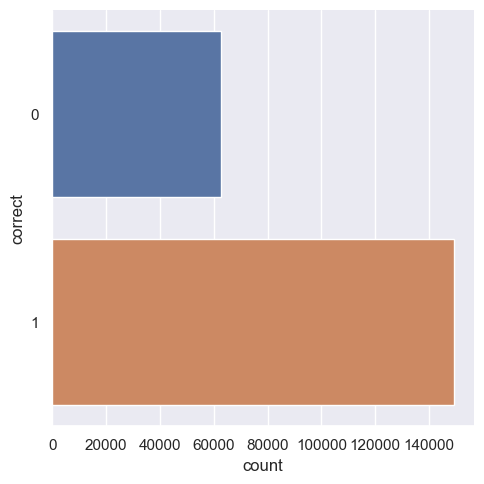

In [23]:
sb.catplot(y = 'correct', data = new_data, kind = "count")
plt.show()

In [24]:
count0, count1 = new_data['correct'].value_counts()
print("Ratio of result is Wrong : Correct = ", count0, ":", count1)

Ratio of result is Wrong : Correct =  149252 : 62770


From the ratio, there is large imbalance in the response variable.<br>
This will need to be addressed for classification models to prevent biased towards the majority class, causing bad classification of the minority class.

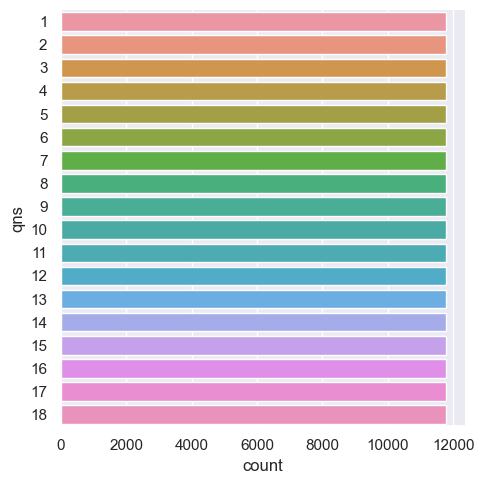

In [25]:
sb.catplot(y = 'qns', data = new_data, kind = "count")
plt.show()

From the above categorical plot, it shows that every question have same number of attempt

In [26]:
# Average correct rate for each question

In [27]:
# Number of correct answers in each level

In [28]:
# Average correct rate for each level

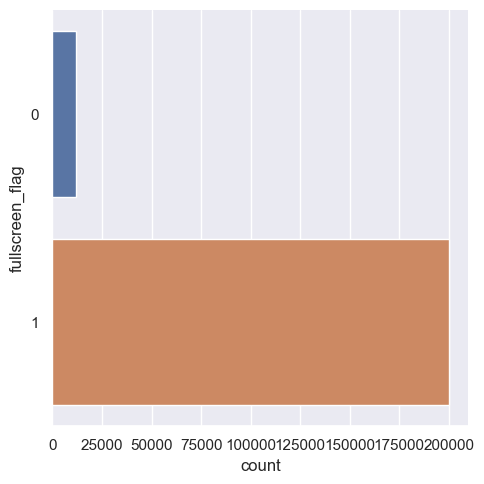

In [29]:
sb.catplot(y = 'fullscreen_flag', data = new_data, kind = "count")
plt.show()

In [30]:
count1, count0 = new_data['fullscreen_flag'].value_counts()
print("Ratio of fullscreen is isFullscreen : notFullscreen = ", count1, ":", count0)

Ratio of fullscreen is isFullscreen : notFullscreen =  199959 : 12063


From the above categorical plot and ratio, it shows that a larger portion of the player is in fullscreen with over 90%.

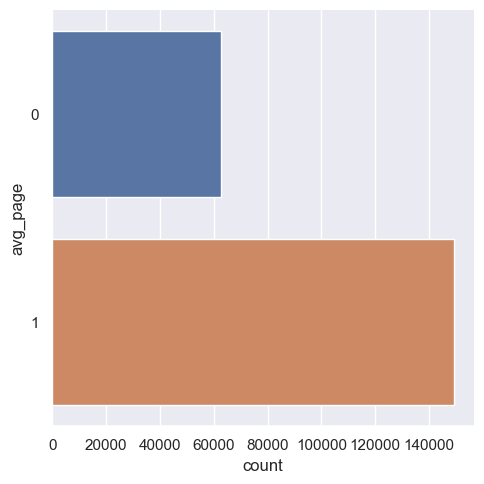

In [31]:
sb.catplot(y = 'avg_page', data = new_data, kind = "count")
plt.show()

In [32]:
count1, count0 = new_data['avg_page'].value_counts()
print("Ratio of avg_page is open1 : open0 = ", count1, ":", count0)

Ratio of avg_page is open1 : open0 =  149261 : 62761


This shows that more questions were answered with after opening the notebook

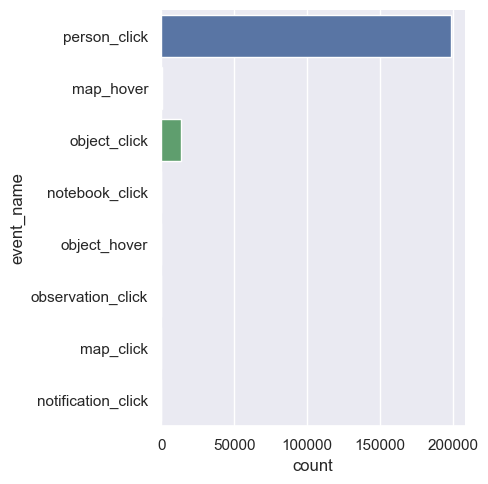

In [33]:
sb.catplot(y = 'event_name', data = new_data, kind = "count")
plt.show()

`person_click` has the most count, followed by `object_click` while the other values were insignificant

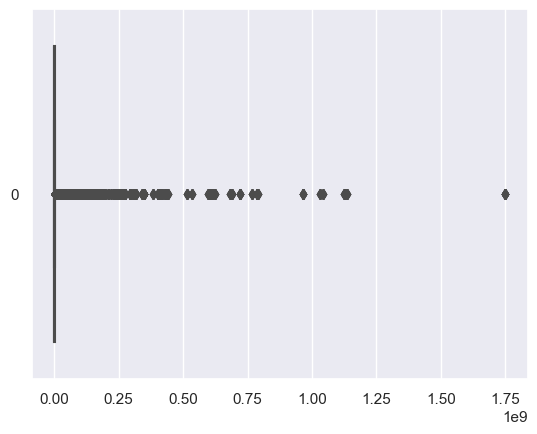

In [34]:
sb.boxplot(data = new_data['elapsed_time'], orient = "h")
plt.show()

As seen from boxplot, there are significant number of outliners.

In [35]:
#calculate the number of outliers
def countOutlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outliners = df[((df < q1-1.5*iqr) | (df > q3 + 1.5*iqr))]
    return len(outliners)

In [36]:
print("elapsed_time has", countOutlier(new_data['elapsed_time']), "outliers.")

elapsed_time has 17614 outliers.


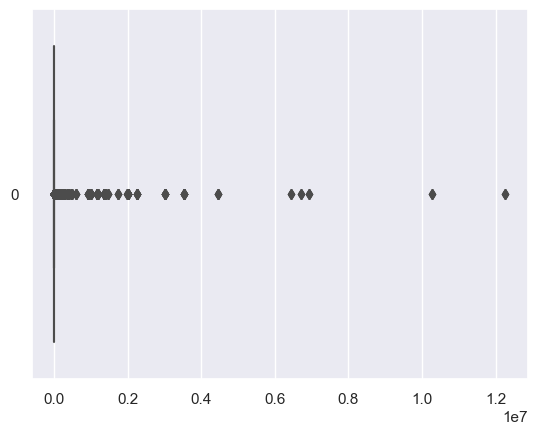

In [37]:
sb.boxplot(data = new_data['hover_duration'], orient = "h")
plt.show()

In [38]:
print("hover_duration has", countOutlier(new_data['hover_duration']), "outliers.")

hover_duration has 13524 outliers.


### Predictors' correlation

                 elapsed_time  avg_page  fullscreen_flag  hover_duration
elapsed_time         1.000000  0.022608         0.014013        0.058128
avg_page             0.022608  1.000000         0.057146        0.000442
fullscreen_flag      0.014013  0.057146         1.000000        0.002510
hover_duration       0.058128  0.000442         0.002510        1.000000


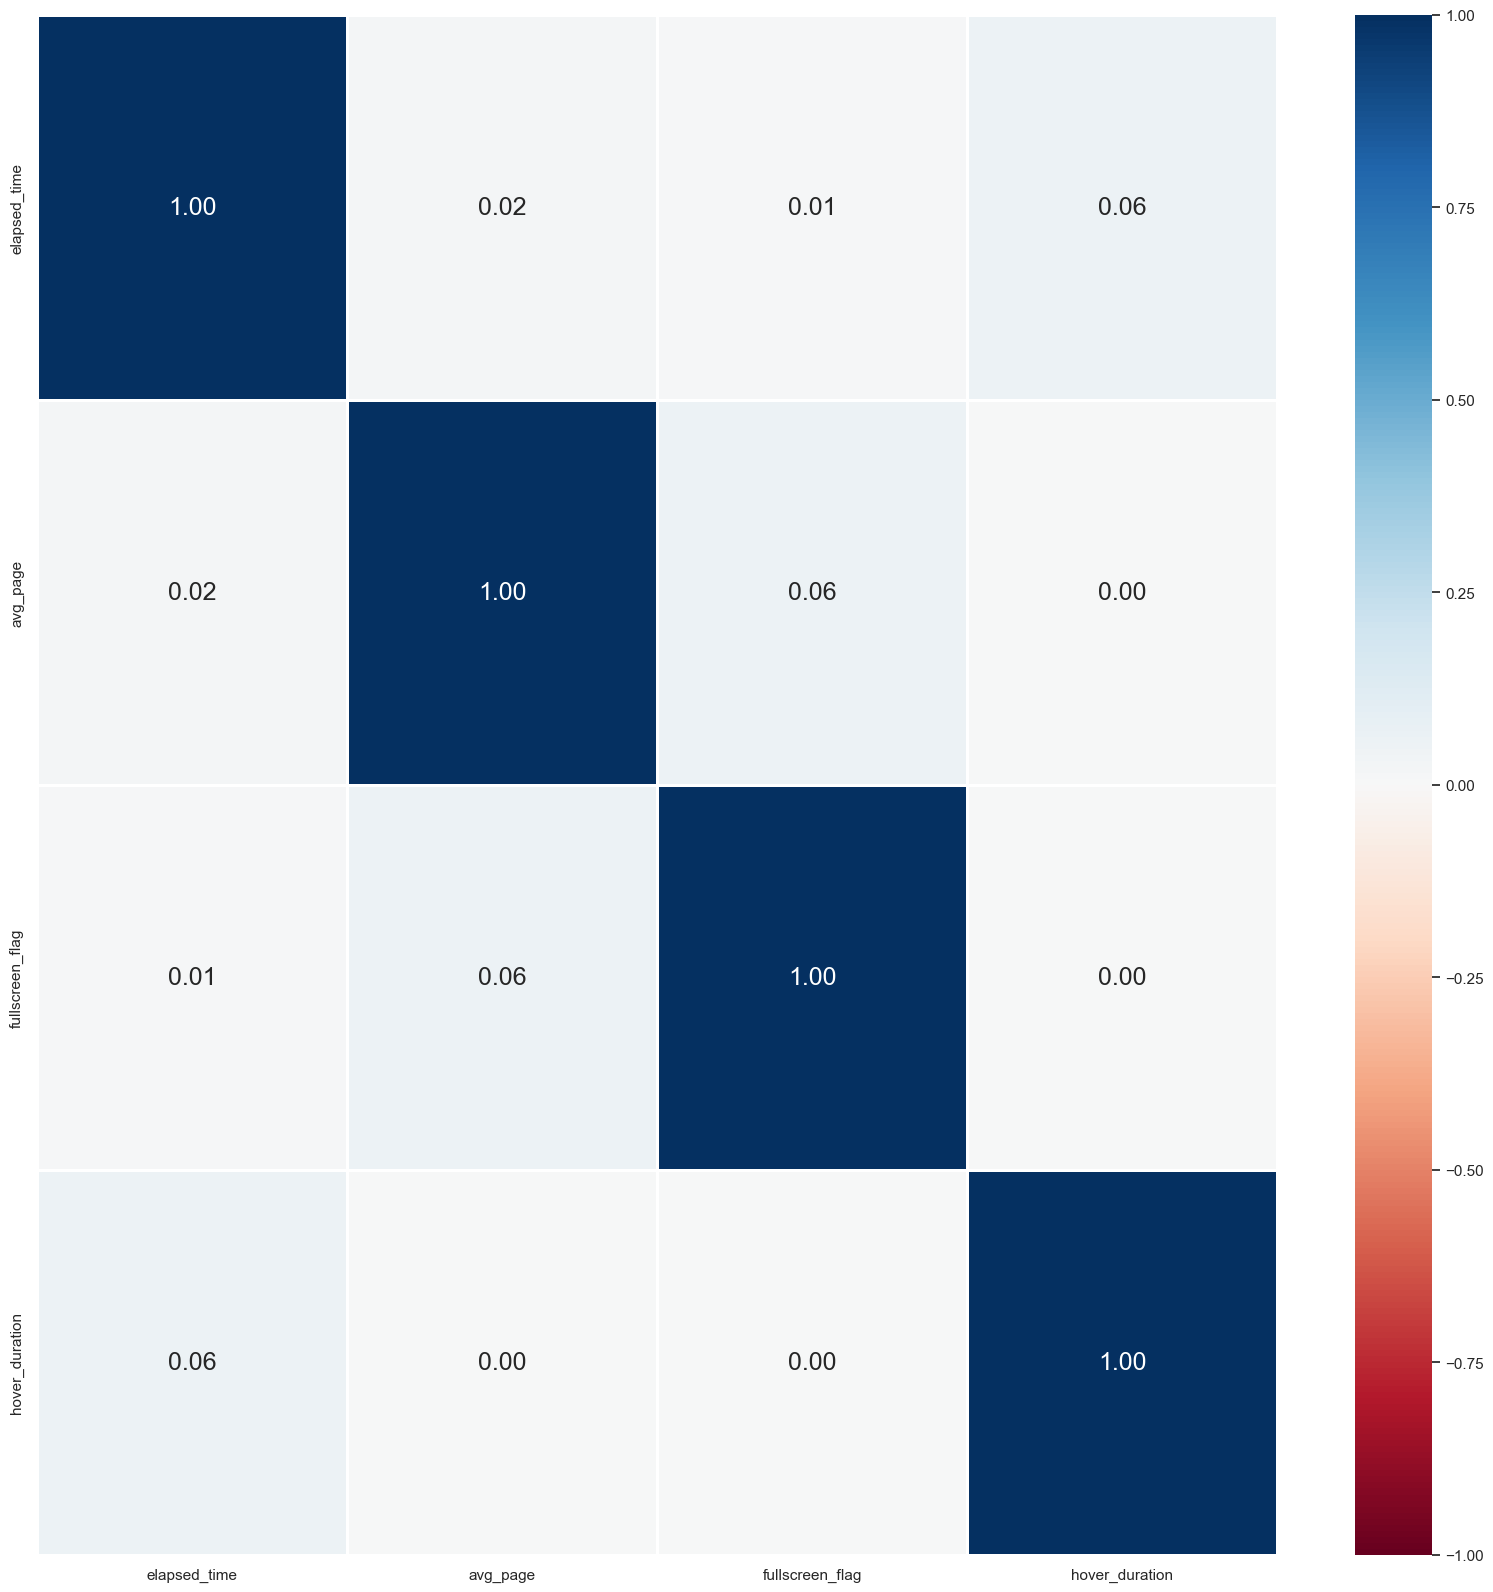

In [39]:
print(new_data.corr())

f = plt.figure(figsize=(20, 20))
sb.heatmap(new_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
plt.show()

### Relationship with `correct`

In [ ]:
# correct vs elapsed_time
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'elapsed_time', y = 'correct', data = new_data)
plt.show()

In [ ]:
# correct vs hover_duration
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'hover_duration', y = 'correct', data = new_data)
plt.show()

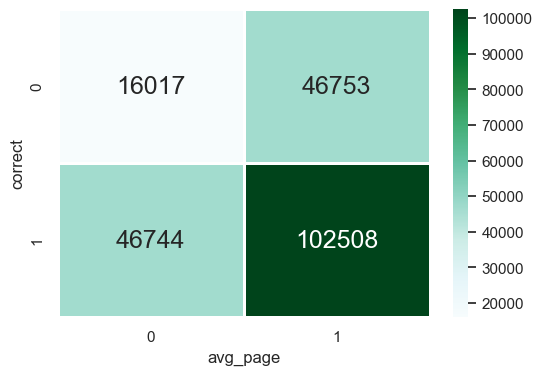

In [22]:
# correct vs avg_page
f = plt.figure(figsize=(6, 4))
sb.heatmap(new_data.groupby(['correct', 'avg_page']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

<AxesSubplot:xlabel='fullscreen_flag', ylabel='correct'>

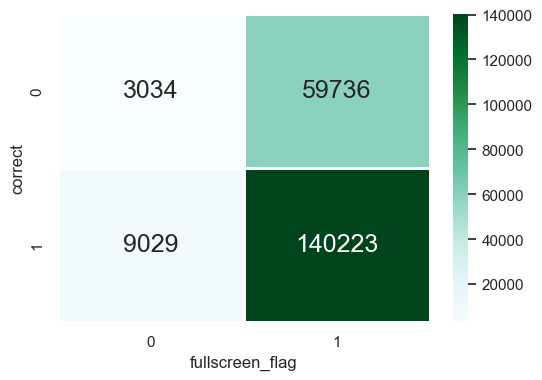

In [23]:
# correct vs fullscreen_flag
f = plt.figure(figsize=(6, 4))
sb.heatmap(new_data.groupby(['correct', 'fullscreen_flag']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='event_name', ylabel='correct'>

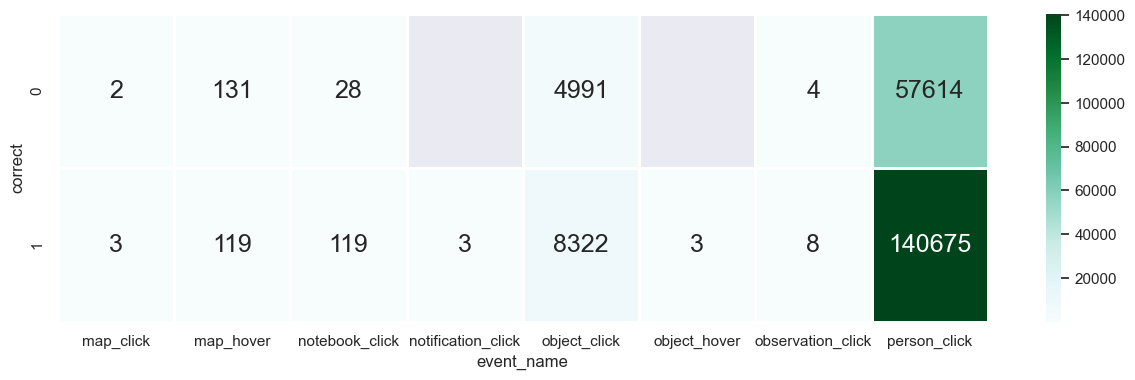

In [24]:
# correct vs event_name
f = plt.figure(figsize=(15, 4))
sb.heatmap(new_data.groupby(['correct', 'event_name']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Machine Learning Models

### Before we go to model however, we create alternative dataframe here using one-hot encoding to fit in models like decision tree.

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


# OneHotEncoding of categorical predictors (not the response)
new_data_cat = new_data[['event_name']]
ohe.fit(new_data_cat)
new_data_cat_ohe = pd.DataFrame(ohe.transform(new_data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(new_data_cat.columns))

# Check the encoded variables
new_data_cat_ohe.info()
new_data_cat_ohe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   event_name_map_click           212022 non-null  float64
 1   event_name_map_hover           212022 non-null  float64
 2   event_name_notebook_click      212022 non-null  float64
 3   event_name_notification_click  212022 non-null  float64
 4   event_name_object_click        212022 non-null  float64
 5   event_name_object_hover        212022 non-null  float64
 6   event_name_observation_click   212022 non-null  float64
 7   event_name_person_click        212022 non-null  float64
dtypes: float64(8)
memory usage: 12.9 MB


,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
212017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# Combine with original data
new_data_num = new_data[['session_id','elapsed_time','avg_page','fullscreen_flag','hover_duration','qns']]
new_data_res = new_data['correct']
ohe_data = pd.concat([new_data_num, new_data_cat_ohe, new_data_res], 
                           sort = False, axis = 1).reindex(index=new_data_num.index)

# Check the final dataframe
ohe_data.info()
ohe_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   session_id                     212022 non-null  category
 1   elapsed_time                   212022 non-null  uint32  
 2   avg_page                       212022 non-null  int64   
 3   fullscreen_flag                212022 non-null  int64   
 4   hover_duration                 195210 non-null  float32 
 5   qns                            212022 non-null  object  
 6   event_name_map_click           212022 non-null  float64 
 7   event_name_map_hover           212022 non-null  float64 
 8   event_name_notebook_click      212022 non-null  float64 
 9   event_name_notification_click  212022 non-null  float64 
 10  event_name_object_click        212022 non-null  float64 
 11  event_name_object_hover        212022 non-null  float64 
 12  event_name_obser

,session_id,elapsed_time,avg_page,fullscreen_flag,hover_duration,qns,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click,correct
0,20090312431273200,194860,0,1,2389.500000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,20090312431273200,194860,0,1,2389.500000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,20090312431273200,194860,0,1,2389.500000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,20090312431273200,499235,0,1,969.333313,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,20090312431273200,499235,0,1,969.333313,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212017,22100221145014656,5487952,1,1,669.000000,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212018,22100221145014656,5487952,1,1,669.000000,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212019,22100221145014656,5487952,1,1,669.000000,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212020,22100221145014656,5487952,1,1,669.000000,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


## Notice here we have ohe_data as alternative dataframe for model fitting.
## We hereby wrap up the preprocessing.

## 3. Model

### 3.1 Decision Tree Model

In [30]:
print(ohe_data['correct'].dtypes) 

object


/Users/sun/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Text(0.5, 0.9, 'qns <= 4.5\ngini = 0.417\nsamples = 148415\nvalue = [43935, 104480]\nclass = Good'),
 Text(0.25, 0.7, 'qns <= 1.5\ngini = 0.243\nsamples = 32973\nvalue = [4660, 28313]\nclass = Good'),
 Text(0.125, 0.5, 'event_name_person_click <= 0.5\ngini = 0.4\nsamples = 8201\nvalue = [2265, 5936]\nclass = Good'),
 Text(0.0625, 0.3, 'elapsed_time <= 287598.5\ngini = 0.486\nsamples = 1406\nvalue = [585, 821]\nclass = Good'),
 Text(0.03125, 0.1, 'gini = 0.442\nsamples = 430\nvalue = [142, 288]\nclass = Good'),
 Text(0.09375, 0.1, 'gini = 0.496\nsamples = 976\nvalue = [443, 533]\nclass = Good'),
 Text(0.1875, 0.3, 'elapsed_time <= 293298.5\ngini = 0.372\nsamples = 6795\nvalue = [1680, 5115]\nclass = Good'),
 Text(0.15625, 0.1, 'gini = 0.333\nsamples = 4198\nvalue = [885, 3313]\nclass = Good'),
 Text(0.21875, 0.1, 'gini = 0.425\nsamples = 2597\nvalue = [795, 1802]\nclass = Good'),
 Text(0.375, 0.5, 'qns <= 3.5\ngini = 0.175\nsamples = 24772\nvalue = [2395, 22377]\nclass = Good'),
 Text(

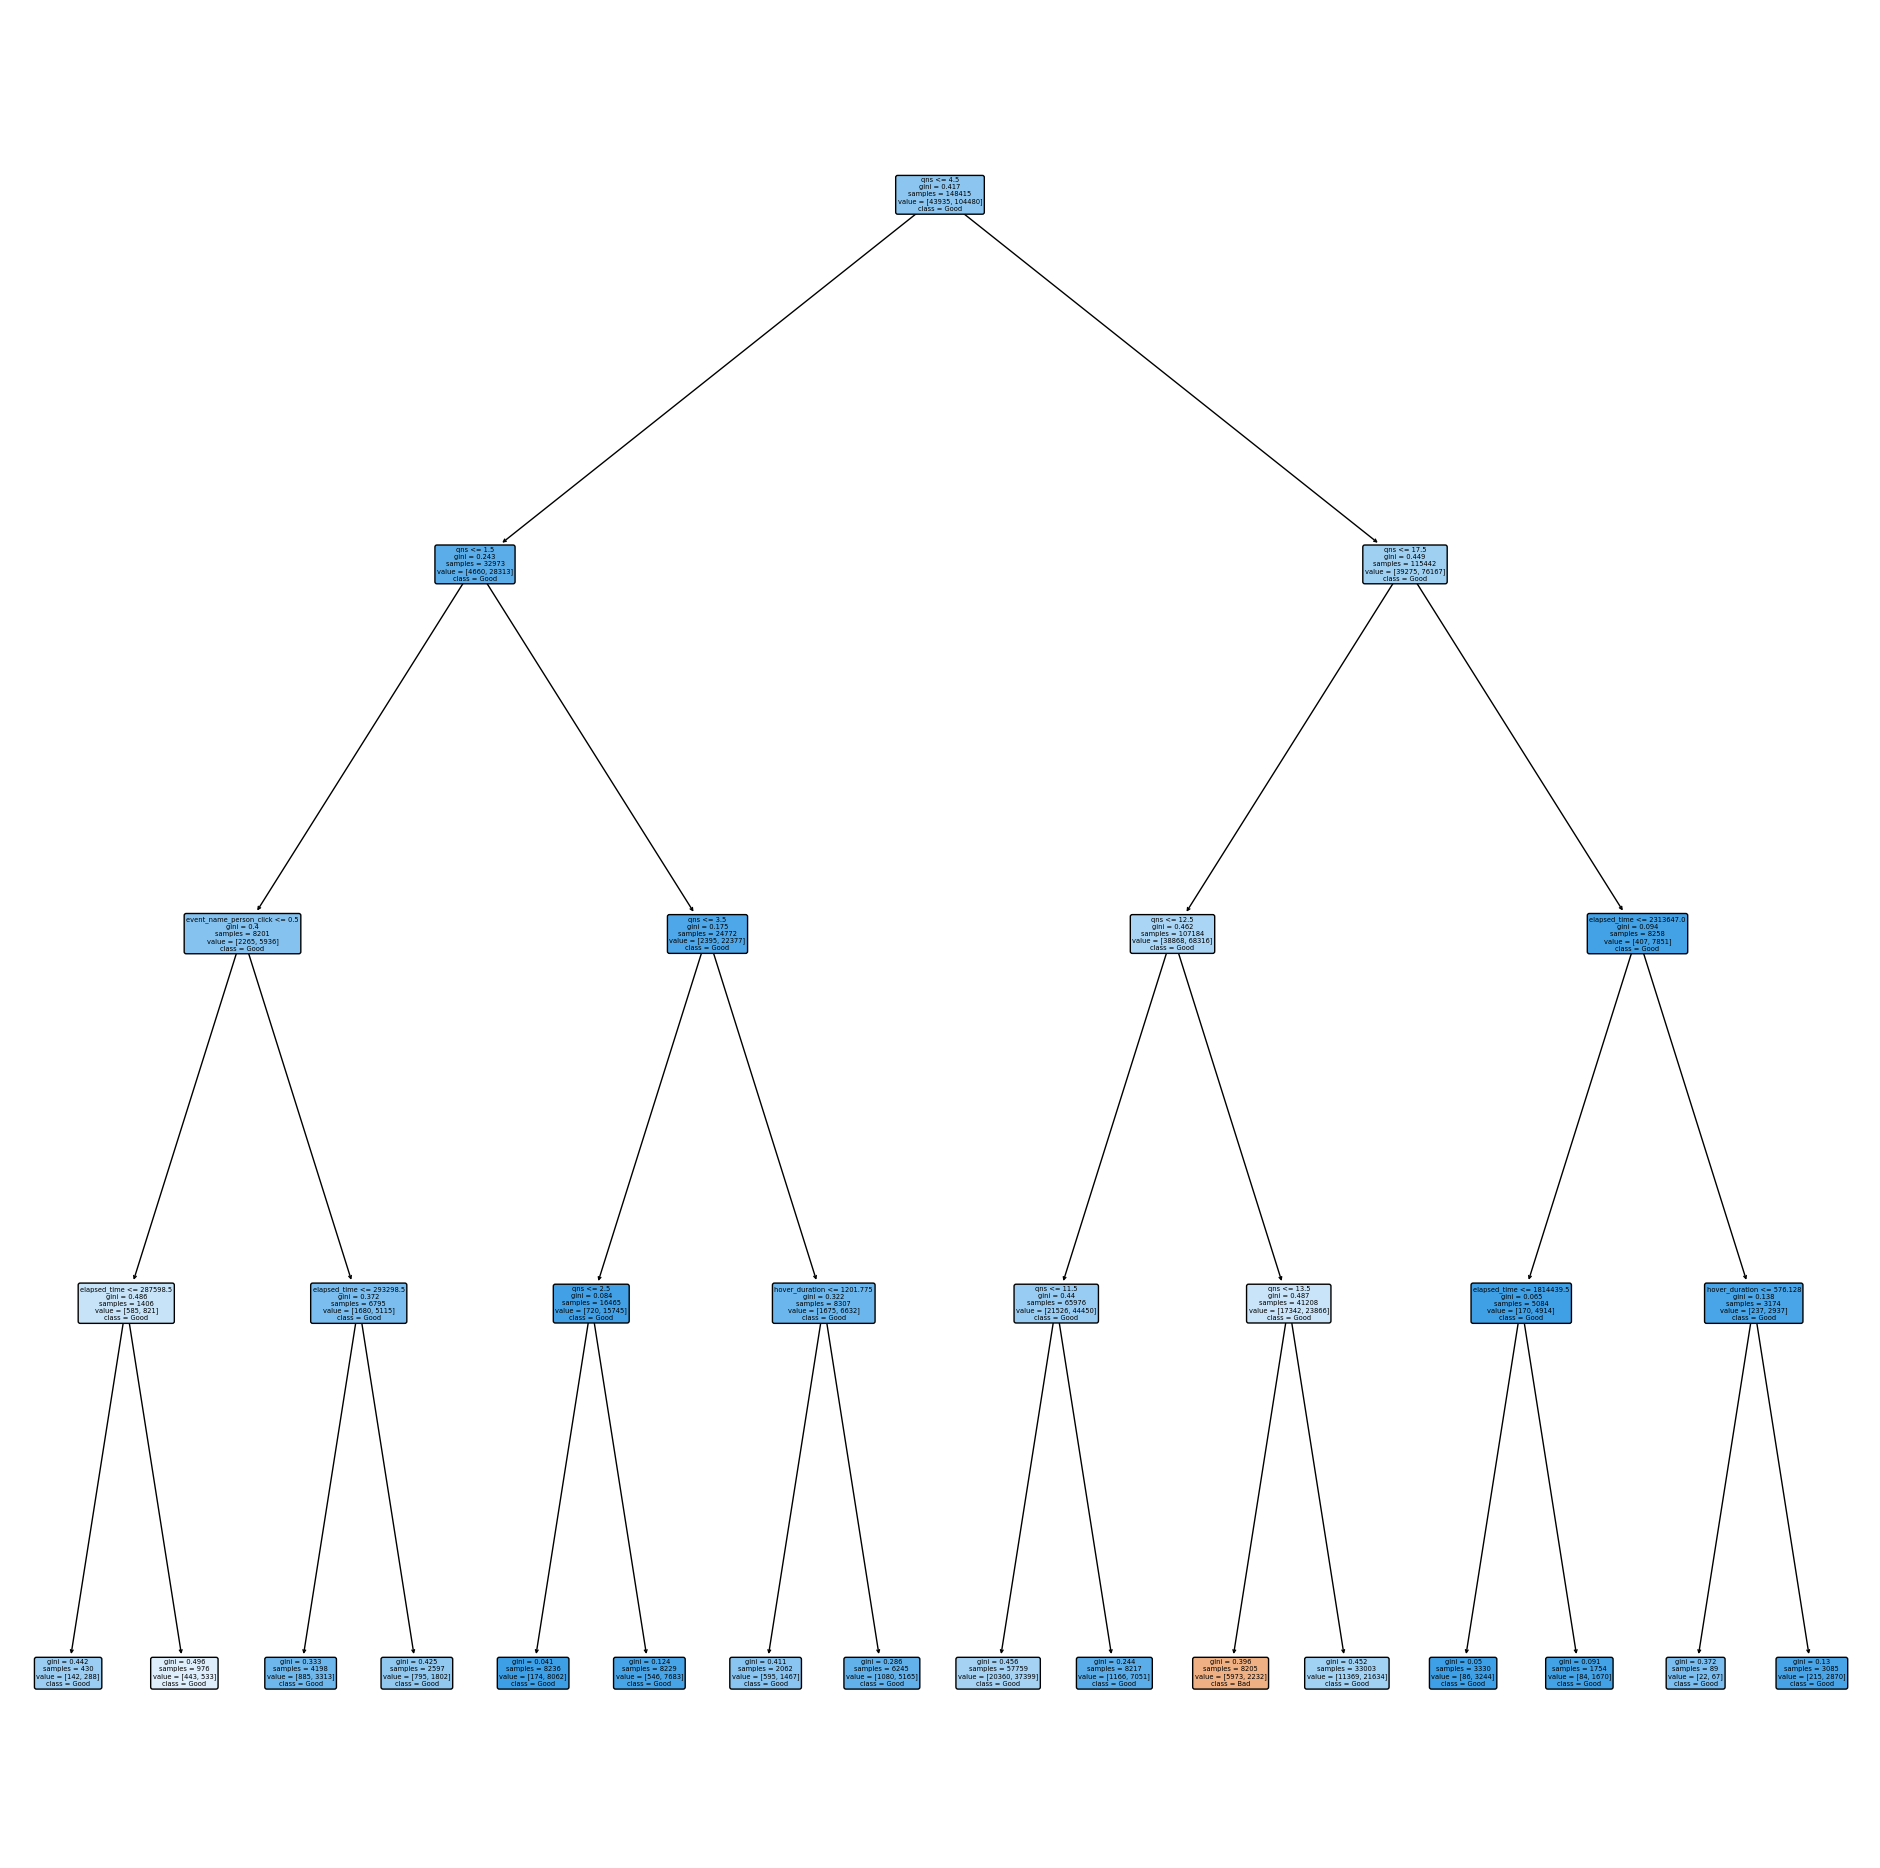

In [37]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Extract Response and Predictors

y = pd.DataFrame(ohe_data['correct'])

# We using labe_lencoder to solve y data type issues.
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
le = LabelEncoder()
# Fit and transform the target variable
y = le.fit_transform(y)

## Here We also drop session_id as it's not related to model
# X = pd.DataFrame(new_data.drop('correct', axis = 1))
X = ohe_data.drop(columns=['correct', 'session_id'])
## While running we encountered "NaN" value warning, it turned out in value 'hover_duration' there's MISSING data points. We replace NaN with mean value of all hover_time.
X = X.fillna(X.mean())

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Bad","Good"])

Train Data
Accuracy  :	 0.7291783175555031

TPR Train :	 0.9786370597243491
TNR Train :	 0.13595083646295664

FPR Train :	 0.8640491635370433
FNR Train :	 0.021362940275650843


<AxesSubplot:>

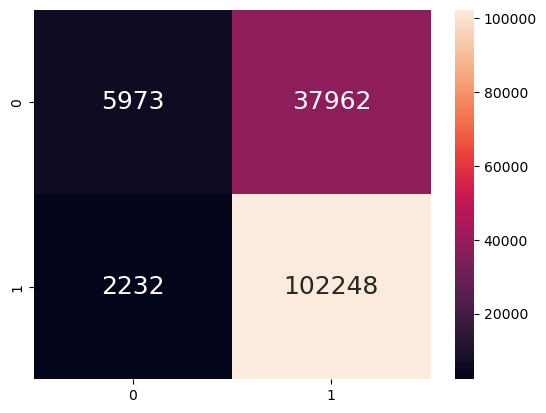

In [38]:
import seaborn as sb
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7300768783310013

TPR Test :	 0.9786920396676494
TNR Test :	 0.13910273427130343

FPR Test :	 0.8608972657286966
FNR Test :	 0.021307960332350575


<AxesSubplot:>

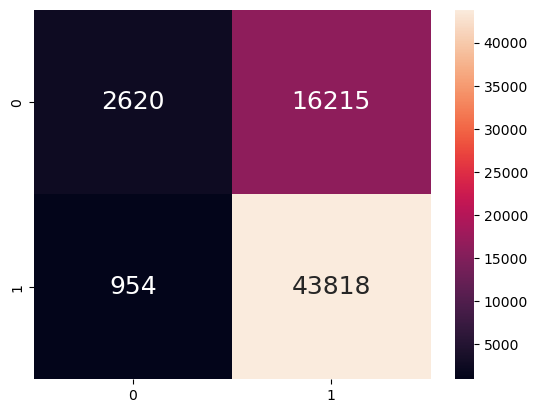

In [39]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Note the huge imbalance in the False Positives and False Negatives in the confusion matrix. False Positives are much higher in number than False Negatives in both Train and Test data. This is not surprising -- actually, this is a direct effect of the large Good vs Bad class imbalance in the response variable Rating. As Rating = Good was more likely in the data, False Positives are more likely too. Let's see if we can fix it.

## 3.2 Binary Decision Tree (with balanced classes)

## 3.3 Random Forest